## Loading modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix,roc_curve,roc_auc_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score,GridSearchCV

In [3]:
pd.set_option('display.max_rows', 754)

In [2]:
df = pd.read_csv('Final_data.csv')

In [3]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer (dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,spread1,spread2,D2,PPE
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,...,9.780000e+02,978.000000,978.000000,978.000000,978.000000,9.780000e+02,978.000000,978.000000,978.000000,966.000000
mean,158.007047,213.238856,118.721585,7.986537,2.167202,2.167831,2.914301,0.003196,0.008474,-44.985927,...,4.684167e-03,0.020215,404.078559,4.603794,0.594070,9.772676e-02,10.777728,26.570975,0.607364,0.044455
std,39.055395,91.236235,42.611636,10.566513,2.708013,2.707510,3.781503,0.005556,0.013810,24.959183,...,1.187287e-02,0.020763,8358.915432,8.798269,0.491322,2.030780e-01,20.081649,40.236987,0.910481,0.090279
min,86.257127,90.749557,65.476000,0.001680,0.000007,0.000680,0.000920,0.000014,0.000011,-99.458189,...,3.277792e-10,0.000539,0.000650,0.000004,0.000000,-1.442695e-10,-7.964984,0.006274,0.005576,0.000000
25%,126.022657,150.868941,79.009558,1.059022,0.372211,0.372211,0.539902,0.000327,0.000898,-60.938406,...,8.264765e-07,0.005990,1.912383,0.305529,0.000000,-1.442695e-10,1.555188,3.147212,0.035881,0.000000
50%,153.998974,194.525933,109.810714,2.650771,0.829123,0.829123,0.983854,0.001147,0.002685,-51.420403,...,6.700124e-06,0.015345,2.297072,0.435337,1.000000,-1.442695e-10,3.420105,7.204311,0.165681,-0.000000
75%,182.431943,242.272250,148.587526,13.360522,3.695631,3.695631,5.205679,0.003881,0.009346,-40.587682,...,9.555924e-05,0.025499,3.273018,0.522908,1.000000,-1.442695e-10,15.267445,39.580668,0.637197,0.023006
max,484.880130,600.000000,470.750459,69.253350,23.962757,23.962757,44.243249,0.064330,0.119080,1.302000,...,1.377800e-01,0.169420,228779.330000,33.047000,1.000000,6.851510e-01,148.697938,369.212867,3.671155,0.527367


In [4]:
df.head()

,Person,Wav file,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,spread1,spread2,D2,PPE,language
0,phon_R01_S01,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,...,0.06545,0.02211,21.033,1,0.414783,-4.813031,0.266482,2.301442,0.284654,English
1,phon_R01_S01,2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,...,0.09403,0.01929,19.085,1,0.458359,-4.075192,0.335590,2.486855,0.368674,English
2,phon_R01_S01,3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,...,0.08270,0.01309,20.651,1,0.429895,-4.443179,0.311173,2.342259,0.332634,English
3,phon_R01_S01,4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,...,0.08771,0.01353,20.644,1,0.434969,-4.117501,0.334147,2.405554,0.368975,English
4,phon_R01_S01,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,...,0.10470,0.01767,19.649,1,0.417356,-3.747787,0.234513,2.332180,0.410335,English


In [5]:
df.columns

Index(['Person', 'Wav file', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer (dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status',
       'RPDE', 'spread1', 'spread2', 'D2', 'PPE', 'language'],
      dtype='object')

In [6]:
df.isnull().sum()

Person                0
Wav file              0
MDVP:Fo(Hz)           0
MDVP:Fhi(Hz)          0
MDVP:Flo(Hz)          0
MDVP:Jitter(%)        0
MDVP:Jitter(Abs)      0
MDVP:RAP              0
MDVP:PPQ              0
Jitter:DDP            0
MDVP:Shimmer          0
MDVP:Shimmer (dB)     0
Shimmer:APQ3          0
Shimmer:APQ5          0
MDVP:APQ              0
Shimmer:DDA           0
NHR                   0
HNR                   0
status                0
RPDE                  0
spread1               0
spread2               0
D2                    0
PPE                  12
language              0
dtype: int64

/tmp/ipykernel_157744/722335332.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count = pd.value_counts(df['status'], sort = True)


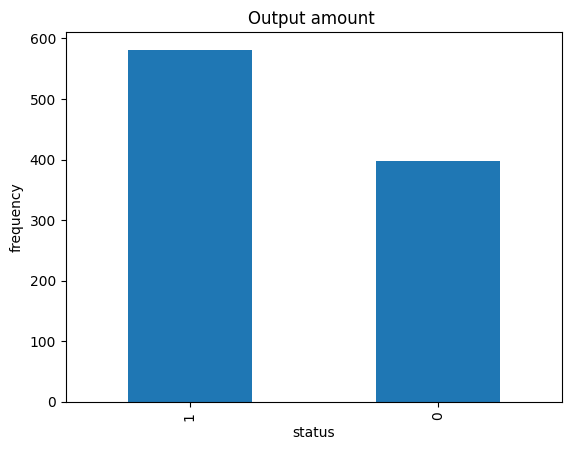

In [7]:
count = pd.value_counts(df['status'], sort = True)
count.plot(kind = "bar")
plt.title("Output amount ")
plt.xlabel("status")
plt.ylabel("frequency")
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Person             978 non-null    object 
 1   Wav file           978 non-null    object 
 2   MDVP:Fo(Hz)        978 non-null    float64
 3   MDVP:Fhi(Hz)       978 non-null    float64
 4   MDVP:Flo(Hz)       978 non-null    float64
 5   MDVP:Jitter(%)     978 non-null    float64
 6   MDVP:Jitter(Abs)   978 non-null    float64
 7   MDVP:RAP           978 non-null    float64
 8   MDVP:PPQ           978 non-null    float64
 9   Jitter:DDP         978 non-null    float64
 10  MDVP:Shimmer       978 non-null    float64
 11  MDVP:Shimmer (dB)  978 non-null    float64
 12  Shimmer:APQ3       978 non-null    float64
 13  Shimmer:APQ5       978 non-null    float64
 14  MDVP:APQ           978 non-null    float64
 15  Shimmer:DDA        978 non-null    float64
 16  NHR                978 non

In [10]:
df=df.drop('Person',axis=1)
df=df.drop('Wav file',axis=1)

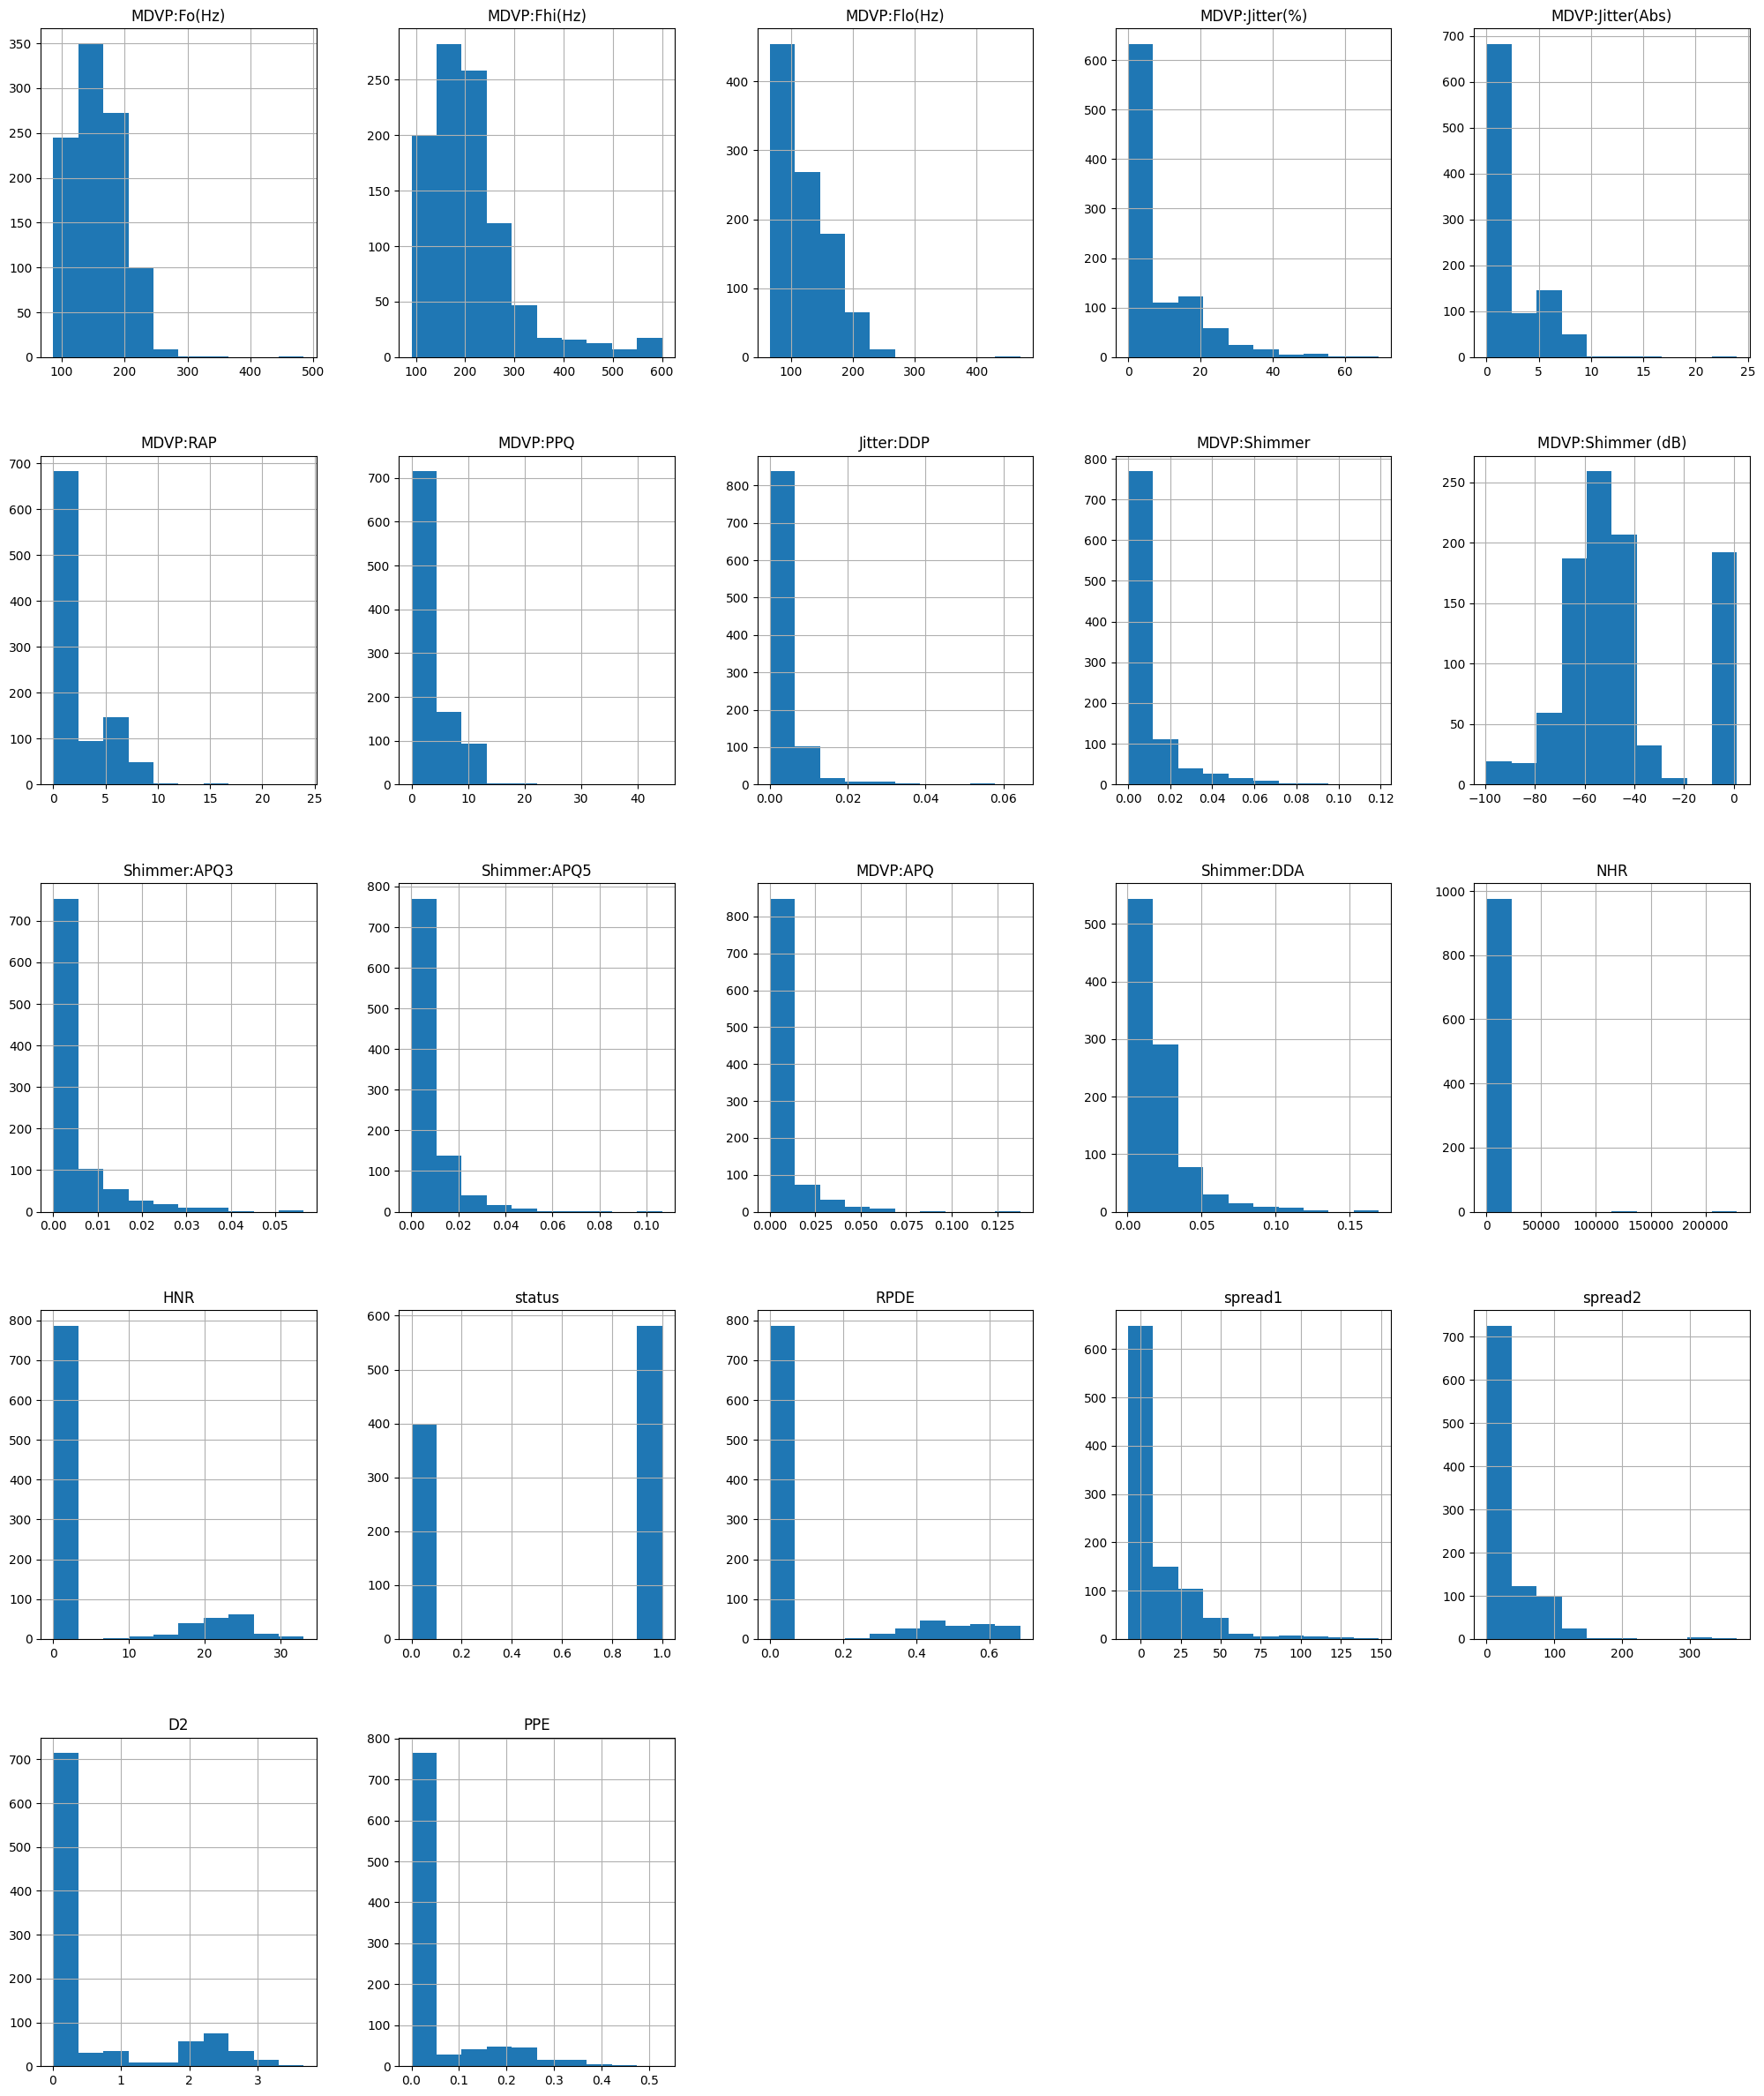

In [11]:
df.hist(figsize=(25,30));

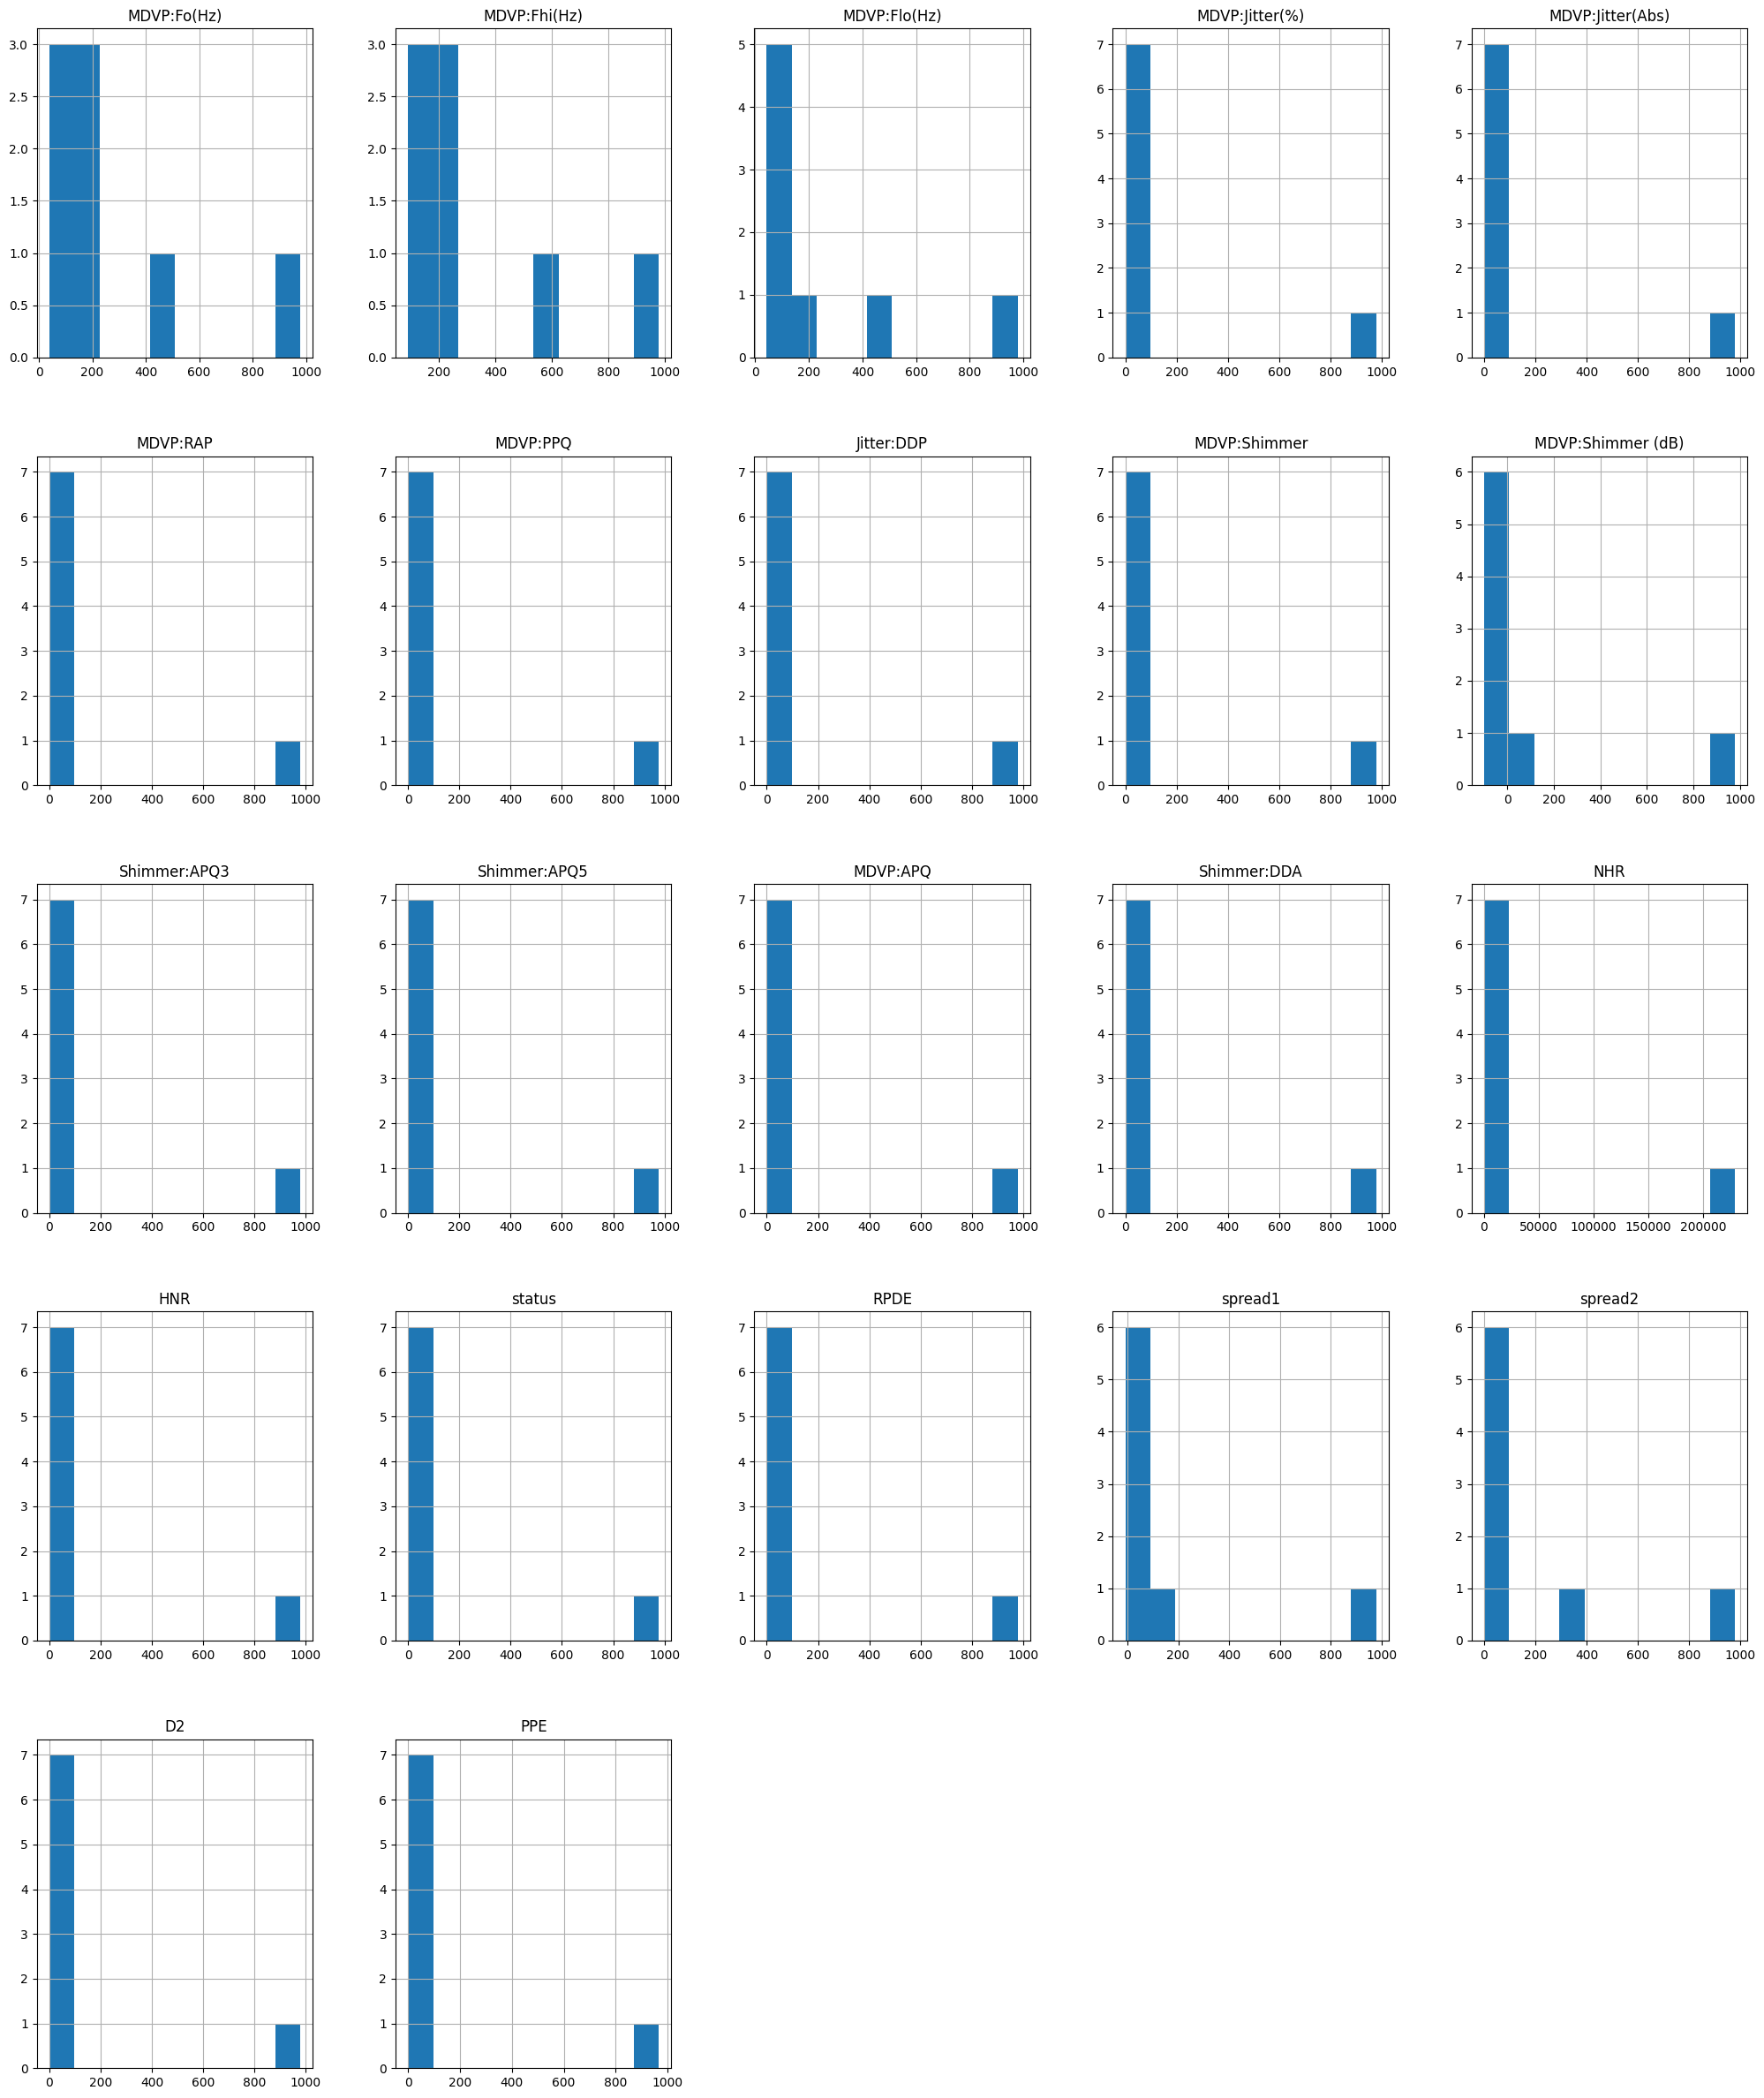

In [12]:
df.describe().hist(figsize=(25,30));

## Scaling data (normalization)

In [13]:
scaler = StandardScaler()

In [19]:
df=df.drop(['language'],axis=1)

In [20]:
x = df.drop(['status'],axis=1)

In [21]:
y = df['status']

## Correlation matrix 

In [22]:
# sns.heatmap(df.drop('status',axis=1).corr(),annot=True,cmap='OrRd')
px.imshow(df.drop('status',axis=1).corr())

In [23]:
X_train,X_test,y_train,y_test=train_test_split(x,y,shuffle=True)

In [24]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Support vector machine classifier

In [25]:
model1 = svm.SVC(kernel='rbf', gamma=1, C=10)

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer and transform the training data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now you can fit the model on the imputed data
model1 = SVC()
model1.fit(X_train, y_train)

SVC()

In [36]:
y_pred = model1.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_pred)

In [37]:
test_data_accuracy*100

71.42857142857143

## Logistic Regression

In [38]:
model2=LogisticRegression()

In [39]:
model2.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_pred = model2.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_pred)

In [41]:
test_data_accuracy*100

64.48979591836735

# Ensemble Methods
## Voting

In [42]:
from sklearn.ensemble import VotingClassifier
# Create an ensemble model using voting
model3 = VotingClassifier(estimators=[('svc', model1), ('logistic_regression', model2)], voting='hard')
model3.fit(X_train,y_train)  
predictions = model3.predict(X_test)
test_data_accuracy = accuracy_score(y_test, predictions)
test_data_accuracy*100

69.79591836734694

## Bagging

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
model4 = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10)
model4.fit(X_train, y_train)
predictions = model4.predict(X_test)
test_data_accuracy = accuracy_score(y_test, predictions)
test_data_accuracy*100

83.6734693877551

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
model4 = BaggingClassifier(estimator=model3, n_estimators=10)
model4.fit(X_train, y_train)
predictions = model4.predict(X_test)
test_data_accuracy = accuracy_score(y_test, predictions)
test_data_accuracy*100

68.9795918367347

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
model9 = BaggingClassifier(estimator=LogisticRegression(), n_estimators=10)
model9.fit(X_train, y_train)
predictions = model9.predict(X_test)
test_data_accuracy = accuracy_score(y_test, predictions)
test_data_accuracy*100

61.63265306122449

## Boosting

In [51]:
from sklearn.ensemble import AdaBoostClassifier

model5 = AdaBoostClassifier(n_estimators=50)
model5.fit(X_train, y_train)
predictions = model5.predict(X_test)
test_data_accuracy = accuracy_score(y_test, predictions)
test_data_accuracy*100

/home/pratik/Desktop/Plaksha_Docs/Semester_4/MLPR/Projects/env/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



77.55102040816327

## Stacking

In [52]:
from sklearn.ensemble import StackingClassifier
estimators = [('svc', model1), ('logistic_regression', model2)]
meta_estimator = LogisticRegression()
model6 = StackingClassifier(estimators=estimators, final_estimator=meta_estimator)
model6.fit(X_train, y_train)
predictions = model6.predict(X_test)

In [53]:
test_data_accuracy = accuracy_score(y_test, predictions)
test_data_accuracy*100

70.20408163265306

In [54]:
from sklearn.ensemble import StackingClassifier
estimators = [('svc', model1), ('logistic_regression', model2)]
meta_estimator = svm.SVC()
model7 = StackingClassifier(estimators=estimators, final_estimator=meta_estimator)
model7.fit(X_train, y_train)
predictions = model7.predict(X_test)

In [55]:
test_data_accuracy = accuracy_score(y_test, predictions)
test_data_accuracy*100

71.0204081632653

#### Hence overall bagging(Decision Tree) at ~95%
#### while stacking(logistic regression, SVM) comes in second with ~ 93%